In [ ]:
operator_type = "RDiffusion" # "RDiffusion" "Advection" "Burgers" "Identity" "Darcy"
print(f"当前测试的算子为: {operator_type}，如果想可视化其他PDE算子，请修改代码中的operator_type变量。")

当前测试的算子为: Burgers，如果想可视化其他PDE算子，请修改代码中的operator_type变量。


## 1. Data Loading and Preprocessing

In [10]:
from visualization.visualization_PDE_utils import *
from train_PDE import PDEOperatorSolver
warnings.filterwarnings('ignore')

config_files = list(Path("data").glob(f"{operator_type}_Operator_config_*.json"))
if not config_files:
    print("❌ 未找到配置文件!")

latest_config = max(config_files, key=os.path.getctime)
with open(latest_config, 'r') as f:
    config = json.load(f)

data_file_path = f"data/{operator_type}_Operator_data/{operator_type}_Operator_data_{config['num_points']}_1.npz"

PDE_solver = PDEOperatorSolver(operator_type=operator_type, config_file=latest_config)

# 加载数据
if os.path.exists(data_file_path):
    print(f"Loading existing data from {data_file_path}...")
    try:
        data = np.load(data_file_path)
    except Exception as e:
        print(f"Data loading failed: {e}")
        print("Regenerating data...")
        PDE_solver.generate_data()
else:
    print("Data file does not exist, generating new data...")
    PDE_solver.generate_data()
print("正在加载数据...")
data = np.load(data_file_path)

# 提取数据
u0_data = data['u0_cals']  # 初始条件
u_data = data['u_cals']    # 真实解

# 检查数据形状并进行必要的调整
if len(u_data.shape) == 3:
    print(f"  检测到3D数据格式: (样本数, 空间, 时间)")
    if u_data.shape[1] != u_data.shape[2]:
        print(f"  注意：空间维度({u_data.shape[1]})与时间维度({u_data.shape[2]})不一致")
elif len(u_data.shape) == 2:
    print(f"  检测到2D数据格式，可能需要reshape")
    
# 确保数据形状一致性
num_samples = u_data.shape[0]
print(f"  总样本数: {num_samples}")

# 创建结果保存目录
save_path = f"visualization_results/{config['model_type']}/{operator_type}_Operator_results"
os.makedirs(save_path, exist_ok=True)
print(f"结果将保存在: {save_path}/")

data.close()

Loading configuration from data/Burgers_Operator_config_1000_1000_100_100_1000.json
Data file does not exist, generating new data...
Generating Burgers operator data...
No valid data found, starting from scratch
Generating Burgers Data


Generating Burgers Data:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating Burgers Data:   5%|▍         | 99/2000 [00:14<04:48,  6.60it/s]

Saving intermediate data... Generated 100/2000 samples


Generating Burgers Data:  10%|█         | 200/2000 [00:32<07:07,  4.21it/s]

Saving intermediate data... Generated 200/2000 samples


Generating Burgers Data:  15%|█▍        | 299/2000 [00:48<04:28,  6.34it/s]

Saving intermediate data... Generated 300/2000 samples


Generating Burgers Data:  20%|█▉        | 399/2000 [01:04<04:13,  6.31it/s]

Saving intermediate data... Generated 400/2000 samples


Generating Burgers Data:  25%|██▍       | 499/2000 [01:21<04:15,  5.87it/s]

Saving intermediate data... Generated 500/2000 samples


Generating Burgers Data:  25%|██▌       | 501/2000 [01:22<09:40,  2.58it/s]

Created backup: data/Burgers_Operator_data/backups/Burgers_Operator_data_100_1_backup_500samples_20250815_190629.npz


Generating Burgers Data:  30%|██▉       | 599/2000 [01:38<04:11,  5.58it/s]

Saving intermediate data... Generated 600/2000 samples


Generating Burgers Data:  35%|███▍      | 699/2000 [01:55<03:16,  6.63it/s]

Saving intermediate data... Generated 700/2000 samples


Generating Burgers Data:  40%|███▉      | 799/2000 [02:13<03:19,  6.03it/s]

Saving intermediate data... Generated 800/2000 samples


Generating Burgers Data:  45%|████▍     | 899/2000 [02:30<02:51,  6.42it/s]

Saving intermediate data... Generated 900/2000 samples


Generating Burgers Data:  50%|████▉     | 999/2000 [02:48<02:51,  5.83it/s]

Saving intermediate data... Generated 1000/2000 samples


Generating Burgers Data:  50%|█████     | 1001/2000 [02:51<13:43,  1.21it/s]

Created backup: data/Burgers_Operator_data/backups/Burgers_Operator_data_100_1_backup_1000samples_20250815_190757.npz


Generating Burgers Data:  55%|█████▍    | 1099/2000 [03:07<02:22,  6.33it/s]

Saving intermediate data... Generated 1100/2000 samples


Generating Burgers Data:  60%|█████▉    | 1199/2000 [03:25<02:04,  6.45it/s]

Saving intermediate data... Generated 1200/2000 samples


Generating Burgers Data:  65%|██████▍   | 1299/2000 [03:43<01:53,  6.19it/s]

Saving intermediate data... Generated 1300/2000 samples


Generating Burgers Data:  70%|██████▉   | 1399/2000 [04:02<01:46,  5.66it/s]

Saving intermediate data... Generated 1400/2000 samples


Generating Burgers Data:  75%|███████▍  | 1499/2000 [04:20<01:15,  6.67it/s]

Saving intermediate data... Generated 1500/2000 samples


Generating Burgers Data:  75%|███████▌  | 1500/2000 [04:24<12:46,  1.53s/it]

Created backup: data/Burgers_Operator_data/backups/Burgers_Operator_data_100_1_backup_1500samples_20250815_190930.npz


Generating Burgers Data:  80%|███████▉  | 1599/2000 [04:41<01:03,  6.36it/s]

Saving intermediate data... Generated 1600/2000 samples


Generating Burgers Data:  85%|████████▍ | 1699/2000 [05:13<01:34,  3.18it/s]

Saving intermediate data... Generated 1700/2000 samples


Generating Burgers Data:  90%|████████▉ | 1799/2000 [05:46<00:51,  3.94it/s]

Saving intermediate data... Generated 1800/2000 samples


Generating Burgers Data:  95%|█████████▍| 1899/2000 [06:20<00:34,  2.92it/s]

Saving intermediate data... Generated 1900/2000 samples


Generating Burgers Data: 100%|█████████▉| 1999/2000 [06:56<00:00,  2.91it/s]

Saving intermediate data... Generated 2000/2000 samples


Generating Burgers Data: 100%|██████████| 2000/2000 [07:03<00:00,  4.72it/s]

Created backup: data/Burgers_Operator_data/backups/Burgers_Operator_data_100_1_backup_2000samples_20250815_191207.npz
Final save: Generated 2000 samples total


Created backup: data/Burgers_Operator_data/backups/Burgers_Operator_data_100_1_backup_2000samples_20250815_191214.npz
Saving data to data/Burgers_Operator_dataset_1000_1000_100_100_1000.npz...
Data generation and saving completed!
正在加载数据...
  检测到3D数据格式: (样本数, 空间, 时间)
  总样本数: 2000
结果将保存在: visualization_results/QuanONet/Burgers_Operator_results/


## 2. Model Loading and Setup

In [ ]:
# 导入模型相关的模块
try:
    from core.models import QuanONet
    from core.quantum_circuits import generate_simple_hamiltonian
    print("✅ 成功导入QuanONet模型")
except ImportError as e:
    print(f"❌ 导入模型失败: {e}")
    raise

# 设置MindSpore环境
ms.context.set_context(mode=ms.context.PYNATIVE_MODE, device_target="CPU")


def load_trained_model(config):
    """加载训练好的模型"""
    # 查找最佳模型文件
    # best_model_path = f"checkpoints/best_{operator_type}_QuanONet.ckpt"
    best_model_path = f"checkpoints/best_RDiffusion_TF-QuanONet_0.01_seed0.ckpt"
    
    if not os.path.exists(best_model_path):
        print(f"❌ 模型文件不存在: {best_model_path}")
        print("将使用随机初始化的模型进行演示")
        model_exists = False
    else:
        print(f"✅ 找到模型文件: {best_model_path}")
        model_exists = True
    
    # 创建模型
    try:
        ham = generate_simple_hamiltonian(config['num_qubits'])                                     
        branch_input_size = config['branch_input_size']
        trunk_input_size = config['trunk_input_size']
        
        model = QuanONet(
            num_qubits=config['num_qubits'],
            branch_input_size=branch_input_size,
            trunk_input_size=trunk_input_size,
            net_size=tuple(config['net_size']),
            ham=ham,
            scale_coeff=config['scale_coeff'],
            if_trainable_freq=config.get('if_trainable_freq', False)
        )
        
        # 如果模型文件存在，加载权重
        if model_exists:
            try:
                param_dict = load_checkpoint(best_model_path)
                # 注意：由于我们改变了branch_input_size，可能无法直接加载权重
                # 这里我们尝试加载，如果失败就使用随机初始化
                load_param_into_net(model, param_dict, strict_load=False)
                print(f"✅ 模型权重加载成功 (可能部分参数不匹配)")
            except Exception as e:
                print(f"⚠️ 模型权重加载失败，使用随机初始化: {e}")
        else:
            print("⚠️ 使用随机初始化的模型")
        
        model.set_train(False)  # 设置为评估模式
        print(f"✅ 模型创建成功: {config['model_type']}")
        
        return model
        
    except Exception as e:
        print(f"❌ 模型创建失败: {e}")
        return None

# 加载模型
model = load_trained_model(config)
if model is not None:
    print("模型加载完成，准备进行预测")
else:
    print("模型加载失败")

✅ 成功导入QuanONet模型
✅ 找到模型文件: checkpoints/best_Burgers_QuanONet.ckpt
✅ 模型权重加载成功 (可能部分参数不匹配)
✅ 模型创建成功: QuanONet
模型加载完成，准备进行预测


## 3. Generate Prediction Results

In [12]:
# 从数据集中采样两组样本进行分析
sample_indices = [0, 1]  # 选择两个样本进行对比
num_samples = len(sample_indices)

print(f"正在处理 {num_samples} 个样本: {sample_indices}")

# 检查数据的实际分辨率
sample_u_data = u_data[0]
if len(sample_u_data.shape) == 2:
    actual_resolution_x, actual_resolution_t = sample_u_data.shape
    print(f"数据集实际分辨率: {actual_resolution_x} x {actual_resolution_t}")
else:
    print(f"数据格式异常: {sample_u_data.shape}")
    actual_resolution_x = actual_resolution_t = config['num_points']  # 使用默认值

# 使用数据集的实际分辨率，不进行下采样
num_x = actual_resolution_x  # 空间点数
num_t = actual_resolution_t  # 时间点数

print(f"使用数据集原始分辨率: {num_x} x {num_t}")

# 创建空间坐标 (假设空间范围为 [0, 1])
x_coords = np.linspace(0, 1, num_x)
# 创建时间坐标 (假设时间范围为 [0, 1])  
t_coords = np.linspace(0, 1, num_t)

# 为模型预测准备数据
results = []


for i, sample_idx in enumerate(sample_indices):
    
    # 获取初始条件和真实解
    u0_sample = u0_data[sample_idx]  # shape: 根据数据集实际形状
    u_true_sample = u_data[sample_idx]  # shape: 根据数据集实际形状
    # 模型预测
    u_pred_sample = generate_predictions_mindspore(model, u0_sample, num_points=config['num_points'])
    
    # 存储结果
    result = {
        'sample_idx': sample_idx,
        'u0': u0_sample,
        'u_true': u_true_sample,
        'u_pred': u_pred_sample,
        'x_coords': x_coords,
        't_coords': t_coords
    }
    results.append(result)

print(f"所有样本预测完成!")

正在处理 2 个样本: [0, 1]
数据集实际分辨率: 100 x 100
使用数据集原始分辨率: 100 x 100


所有样本预测完成!


## 4. Generate Visualization Results

开始生成可视化结果...

1. 生成样本对比图 (四子图布局)...


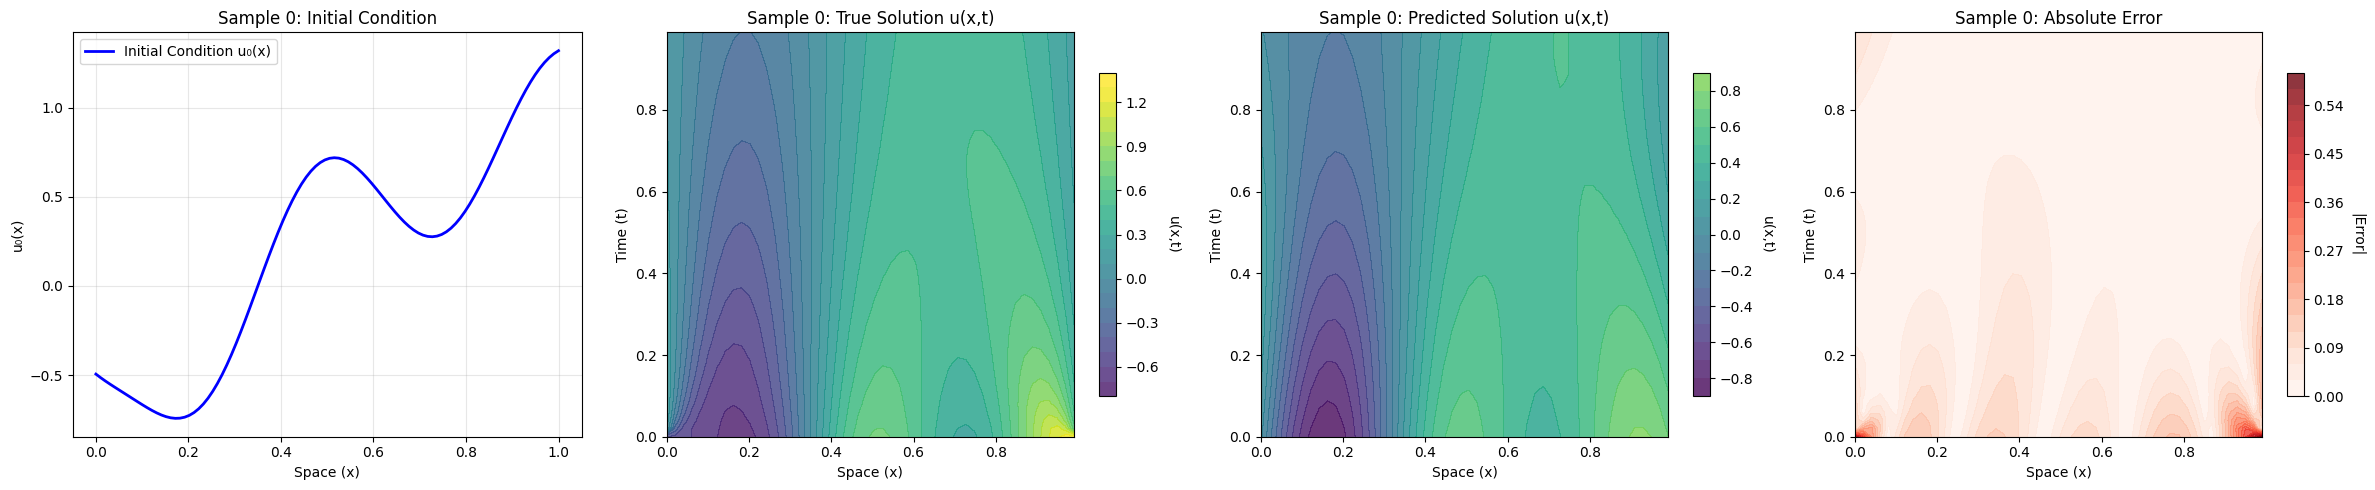

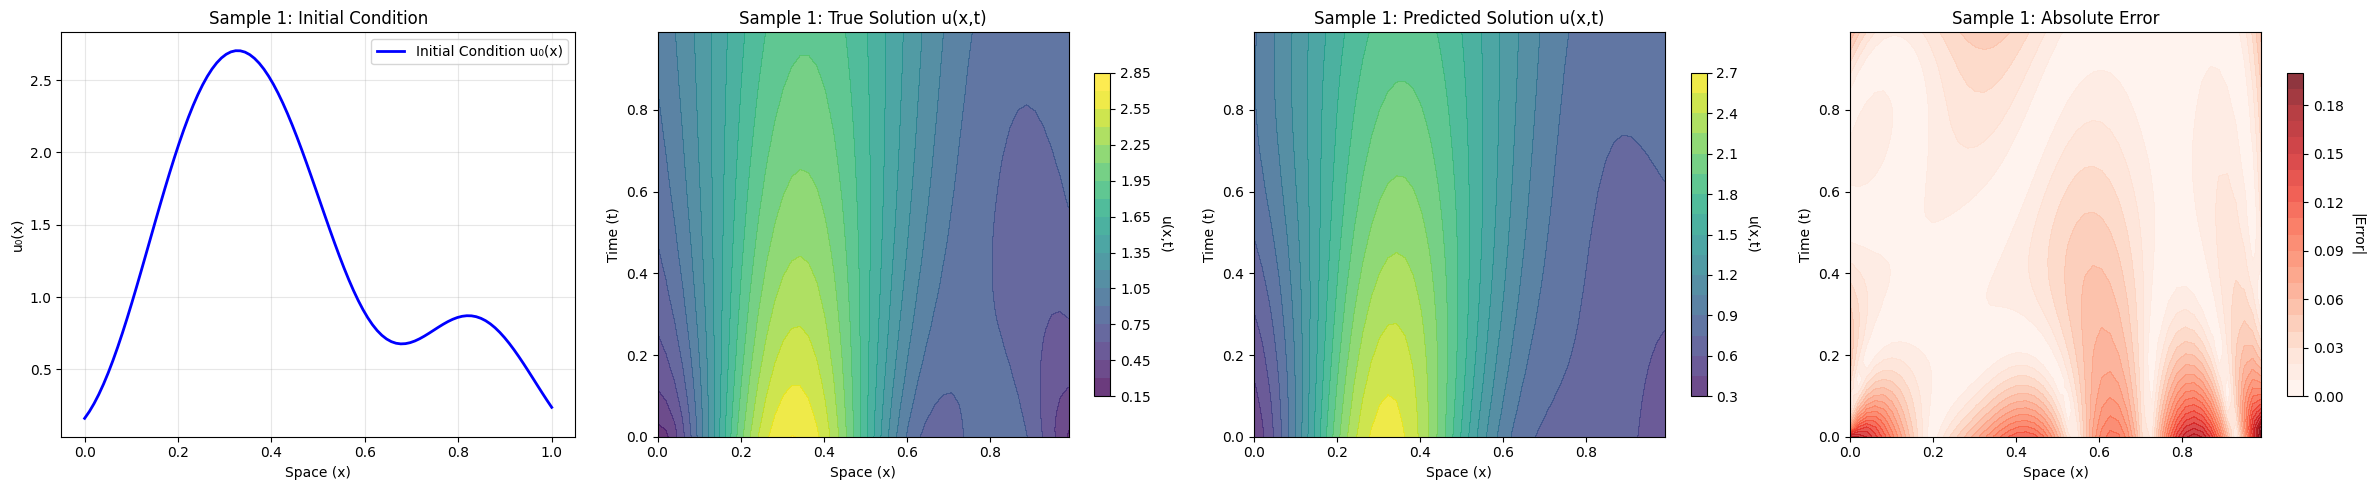


2. 统计摘要:
样本 0: MSE=0.002645, MAE=0.033374, 最大误差=0.652229
样本 1: MSE=0.001127, MAE=0.022943, 最大误差=0.229485

整体统计: MSE=0.001886, MAE=0.028159, 最大误差=0.652229

结果已保存在: visualization_results/QuanONet/Burgers_Operator_results/
可视化分析完成!


In [13]:
# 生成可视化结果
print("开始生成可视化结果...")

# 1. 为每个样本生成对比图 (包含误差热图)
print("\n1. 生成样本对比图 (四子图布局)...")
for result in results:
    sample_idx = result['sample_idx']
    plot_comparison(result, save_path)

# 2. 生成统计摘要
print("\n2. 统计摘要:")
print("="*50)

for i, result in enumerate(results):
    sample_idx = result['sample_idx']
    u_true = result['u_true']
    u_pred = result['u_pred']
    
    # 计算误差统计
    abs_error = np.abs(u_true - u_pred)
    mse = np.mean((u_true - u_pred)**2)
    mae = np.mean(abs_error)
    max_abs_error = np.max(abs_error)
    
    print(f"样本 {sample_idx}: MSE={mse:.6f}, MAE={mae:.6f}, 最大误差={max_abs_error:.6f}")

# 计算整体统计
all_true = np.concatenate([result['u_true'].flatten() for result in results])
all_pred = np.concatenate([result['u_pred'].flatten() for result in results])

overall_mse = np.mean((all_true - all_pred)**2)
overall_mae = np.mean(np.abs(all_true - all_pred))
overall_max_error = np.max(np.abs(all_true - all_pred))

print(f"\n整体统计: MSE={overall_mse:.6f}, MAE={overall_mae:.6f}, 最大误差={overall_max_error:.6f}")
print(f"\n结果已保存在: {save_path}/")
print("可视化分析完成!")

开始生成方程真解...
绘制算子真解与预测解对比图...
开始生成可视化结果...

1. 生成样本对比图 (四子图布局)...


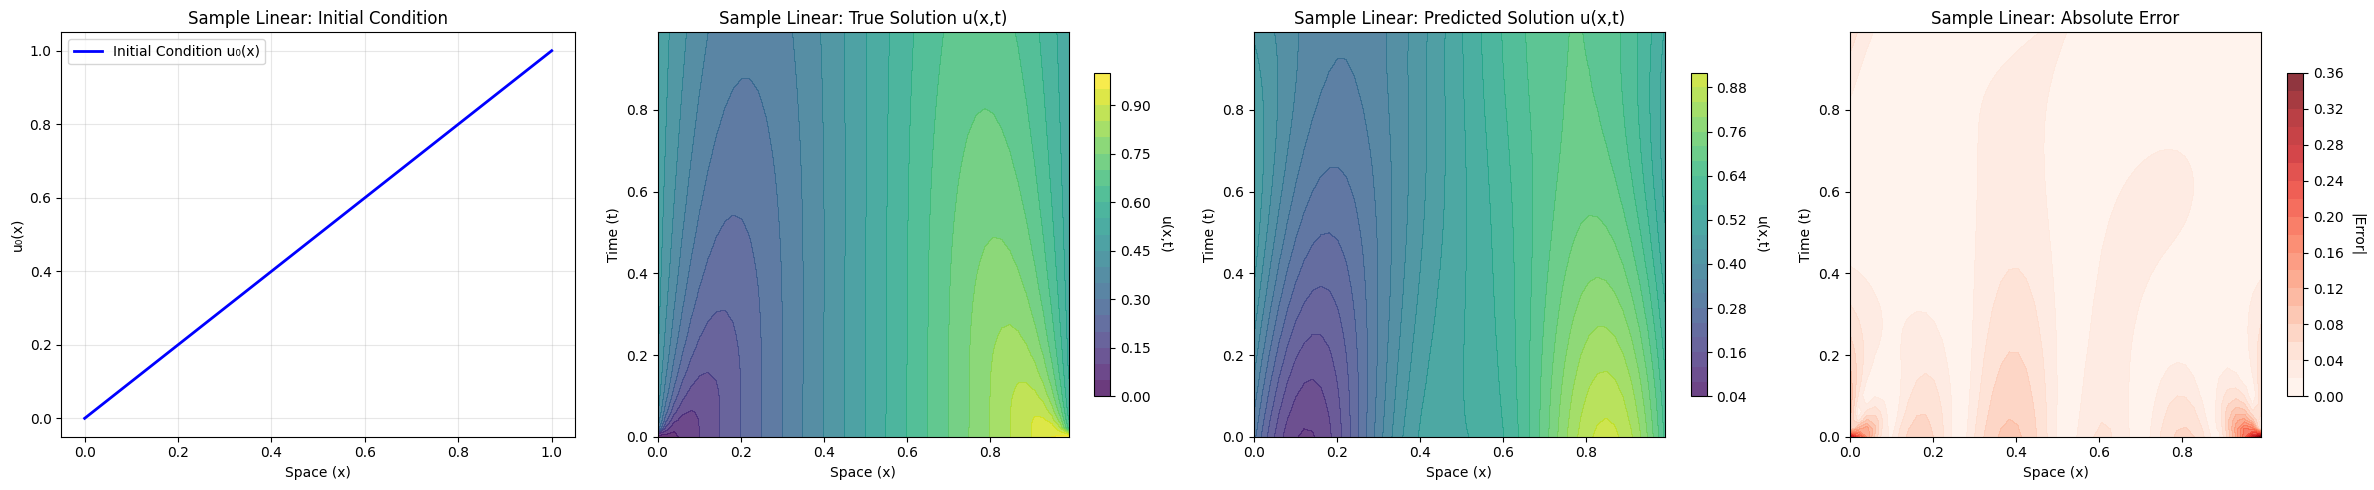

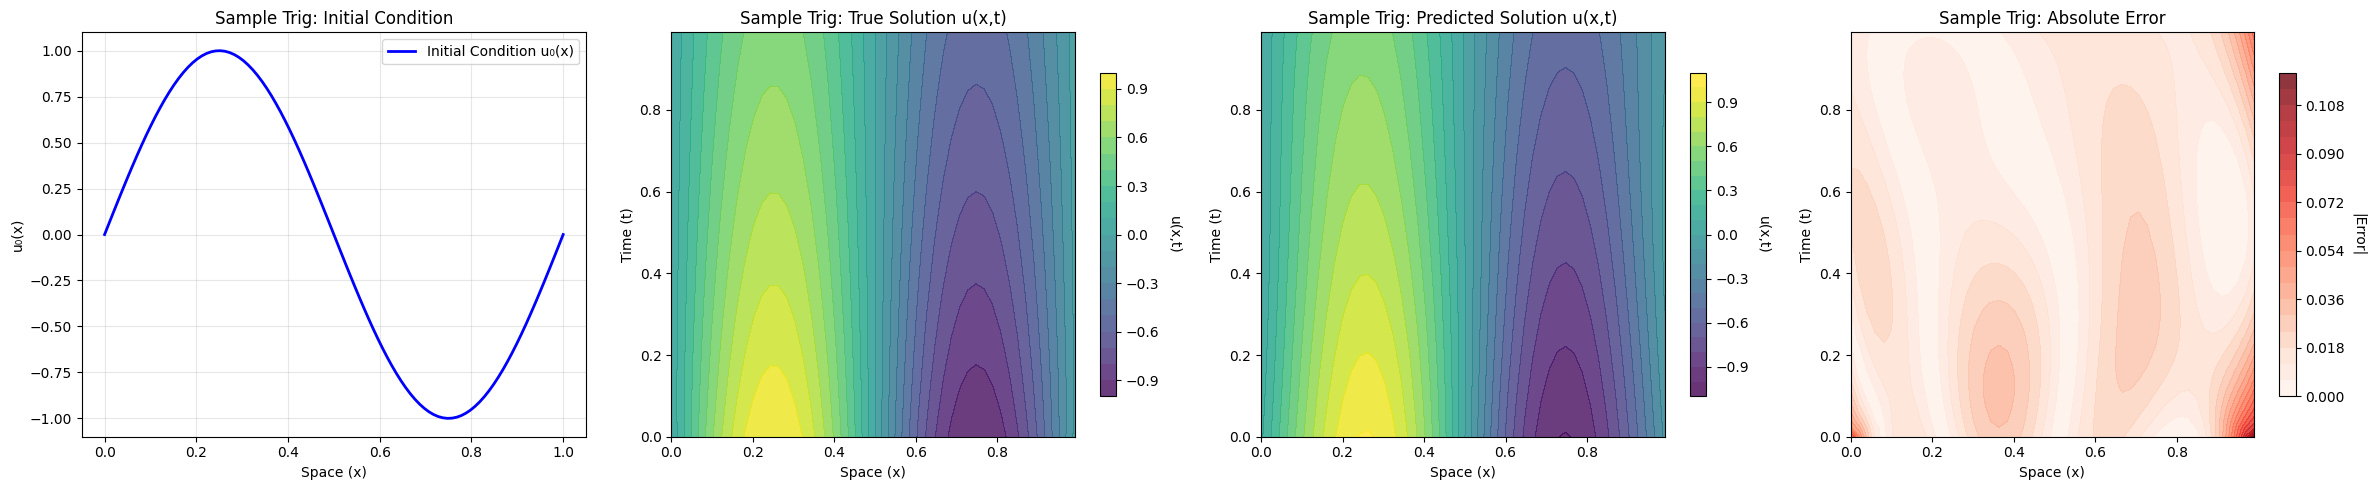


2. 统计摘要:
样本 Linear: MSE=0.000969, MAE=0.022816, 最大误差=0.404684
样本 Trig: MSE=0.000309, MAE=0.014174, 最大误差=0.129816

整体统计: MSE=0.000639, MAE=0.018495, 最大误差=0.404684

结果已保存在: visualization_results/QuanONet/Burgers_Operator_results/
可视化分析完成!


In [14]:
print("开始生成方程真解...")
from data_utils.data_generation import *
func_operator_type = f"solve_{operator_type.lower()}_pde"
solve_func = globals()[func_operator_type]

num_points = config['num_points']
# 创建两种初始条件：线性函数和三角函数
x = np.linspace(0, 1, config["branch_input_size"])
# 线性函数 u0 = x
u0_linear = x
# 三角函数 u0 = sin(π*x)
u0_trig = np.sin(2*np.pi*x)
u0_conditions = {'Linear': u0_linear, 'Trig': u0_trig}
# 选择两种初始条件进行详细对比：线性函数和三角函数
conditions = ['Linear', 'Trig']
results = []
for i, condition in enumerate(conditions):
    u0_condition = u0_conditions[condition]
    # 模型预测
    u_pred_condition = generate_predictions_mindspore(model, u0_condition, num_points=config['num_points'])
    u_solution, u0_cal = solve_func(num_points, length_scale=0.2, u0_cal=u0_condition)
    # 存储结果
    result = {
        'sample_idx': condition,
        'u0': u0_condition,
        'u_true': u_solution,
        'u_pred': u_pred_condition,
        'x_coords': x_coords,
        't_coords': t_coords
    }
    results.append(result)
# 为选定的初始条件绘制对比图
print(f"绘制算子真解与预测解对比图...")
# 生成可视化结果
print("开始生成可视化结果...")
# 1. 为每个样本生成对比图 (包含误差热图)
print("\n1. 生成样本对比图 (四子图布局)...")
for result in results:
    plot_comparison(result, save_path)
# 2. 生成统计摘要
print("\n2. 统计摘要:")
print("="*50)
for i, result in enumerate(results):
    condition = result['sample_idx']
    u_true = result['u_true']
    u_pred = result['u_pred']
    # 计算误差统计
    abs_error = np.abs(u_true - u_pred)
    mse = np.mean((u_true - u_pred)**2)
    mae = np.mean(abs_error)
    max_abs_error = np.max(abs_error)
    print(f"样本 {condition}: MSE={mse:.6f}, MAE={mae:.6f}, 最大误差={max_abs_error:.6f}")
# 计算整体统计
all_true = np.concatenate([result['u_true'].flatten() for result in results])
all_pred = np.concatenate([result['u_pred'].flatten() for result in results])
overall_mse = np.mean((all_true - all_pred)**2)
overall_mae = np.mean(np.abs(all_true - all_pred))
overall_max_error = np.max(np.abs(all_true - all_pred))
print(f"\n整体统计: MSE={overall_mse:.6f}, MAE={overall_mae:.6f}, 最大误差={overall_max_error:.6f}")
print(f"\n结果已保存在: {save_path}/")
print("可视化分析完成!")